Assume that X follows Poisson distribution given by
$$
 P(X=x, \lambda_i) = \frac{\lambda^x e^{-\lambda}}{x!},
$$

where 
$\lambda_i = \theta_0 + \theta_1 \times z_i$, $\theta_0=0.5$, $\theta_1=0.5$, and $z_i \sim \text{Bern}(0.7)$

and number of observations is equal to $n=10,000$.


Tasks:
1. generate $z_i$,
2. generate $\lambda_i$ according to $\theta_0 + \theta_1 \times z_i$,
3. generate $X \sim Poisson(\lambda_i)$
4. derive log-likelihood, gradient and hessian (by hand, \LaTeX code for equations are preferred),
5. obtain MLE of $\boldsymbol{\theta} = (\theta_0, \theta_1)$ using Newton-Raphson method (gradient and hessian should be applied). 

In [1]:
t_0 <- 0.5
t_1 <- 0.5


In [2]:
#1
z <- rbinom(10000, 1, 0.7) 
z

[1] 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
   [37] 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
   [73] 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0
  [109] 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
  [145] 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0
  [181] 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
  [217] 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1
  [253] 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
  [289] 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1
  [325] 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1
  [361] 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1
  [397] 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1
  [433] 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
  [469] 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
  [505] 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
  [541] 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
  [577] 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0
  [613] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1
  [649] 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0
  [685] 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1
  [721] 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0
  [757] 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1
  [793] 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1
  [829] 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1
  [865] 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1
  [901] 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
  [937] 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
  [973] 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 [1009] 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1
 [1045] 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0
 [1081] 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 [1117] 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 [1153] 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1
 [1189] 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1
 [1225] 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 [1261] 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1
 [1297] 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1
 [1333] 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1
 [1369] 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 [1405] 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0
 [1441] 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1
 [1477] 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 [1513] 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0
 [1549] 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1
 [1585] 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 [1621] 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 [1657] 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0
 [1693] 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 [1729] 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1
 [1765] 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1
 [18

In [3]:
#2
lambda <- 0.5 + 0.5*z
lambda

[1] 0.5 1.0 1.0 0.5 1.0 0.5 1.0 0.5 1.0 1.0 1.0 1.0 0.5 0.5 0.5 1.0 1.0 1.0
   [19] 1.0 0.5 1.0 1.0 0.5 1.0 1.0 0.5 0.5 1.0 0.5 1.0 0.5 0.5 1.0 1.0 0.5 0.5
   [37] 1.0 1.0 1.0 0.5 0.5 1.0 1.0 0.5 1.0 1.0 0.5 0.5 1.0 0.5 1.0 1.0 1.0 1.0
   [55] 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 0.5 1.0 0.5 1.0 1.0 1.0 0.5
   [73] 1.0 0.5 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 1.0 1.0 0.5 0.5 0.5 1.0 1.0 1.0
   [91] 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 0.5 0.5 1.0 0.5 0.5 0.5 1.0 0.5
  [109] 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5 0.5 1.0
  [127] 0.5 0.5 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0
  [145] 0.5 1.0 1.0 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 0.5
  [163] 0.5 0.5 1.0 1.0 0.5 0.5 0.5 0.5 1.0 0.5 0.5 0.5 1.0 1.0 1.0 0.5 1.0 0.5
  [181] 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0 0.5 0.5 1.0 0.5 0.5 1.0 1.0 0.5 1.0 1.0
  [199] 0.5 1.0 1.0 1.0 0.5 1.0 1.0 0.5 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
  [217] 1.0 1.0 0.5 1.0 0.5 1.0 0.5 0.5 1.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5 0.5 1.0
  [235] 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 0.5 0.5 1.0 0.5 1.0
  [253] 0.5 1.0 0.5 1.0 0.5 1.0 1.0 0.5 0.5 1.0 1.0 0.5 0.5 1.0 0.5 0.5 1.0 0.5
  [271] 0.5 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 0.5 0.5 0.5
  [289] 0.5 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0 0.5 1.0 0.5 1.0 1.0 0.5
  [307] 1.0 1.0 1.0 1.0 0.5 1.0 0.5 1.0 0.5 0.5 1.0 1.0 0.5 0.5 1.0 0.5 1.0 1.0
  [325] 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 0.5 1.0 1.0 1.0
  [343] 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 0.5 0.5 1.0 0.5 0.5 0.5 1.0 1.0 1.0 1.0
  [361] 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0
  [379] 0.5 1.0 0.5 0.5 1.0 0.5 1.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0
  [397] 0.5 0.5 0.5 1.0 1.0 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0
  [415] 0.5 1.0 1.0 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0
  [433] 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 0.5 0.5 0.5 1.0 1.0 1.0 0.5
  [451] 1.0 1.0 1.0 1.0 1.0 0.5 0.5 0.5 0.5 1.0 1.0 0.5 0.5 1.0 0.5 1.0 0.5 0.5
  [469] 1.0 1.0 0.5 0.5 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 0.5 0.5
  [487] 0.5 1.0 1.0 1.0 0.5 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0
  [505] 0.5 1.0 0.5 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0
  [523] 0.5 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0
  [541] 0.5 0.5 1.0 0.5 0.5 0.5 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 0.5 1.0 0.5
  [559] 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0
  [577] 0.5 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0
  [595] 0.5 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.5 0.5 0.5 1.0 0.5
  [613] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0
  [631] 1.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5 0.5 0.5 1.0 1.0 0.5 1.0 0.5 1.0 0.5 1.0
  [649] 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0 0.5 1.0 0.5 1.0
  [667] 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 0.5 0.5 0.5 1.0 0.5 1.0 1.0 0.5 1.0 0.5
  [685] 0.5 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 0.5 0.5 0.5 1.0 1.0 1.0 1.0
  [703] 1.0 1.0 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0
  [721] 0.5 0.5 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 0.5 0.5 1.0 1.0 0.5 1.0 1.0
  [739] 1.0 0.5 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 0.5
  [757] 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0
  [775] 1.0 0.5 1.0 1.0 1.0 1.0 0.5 0.5 1.0 0.5 1.0 1.0 0.5 0.5 0.5 0.5 0.5 1.0
  [793] 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0
  [811] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0
  [829] 1.0 1.0 0.5 1.0 0.5 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 1.0
  [847] 0.5 1.0 0.5 0.5 1.0 1.0 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0
  [865] 1.0 1.0 1.0 0.5 0.5 1.0 1.0 1.0 1.0 0.5 1.0 1.0 0.5 1.0 1.0 1.0 0.5 1.0
  [883] 1.0 1.0 1.0 0.5 0.5 0.5 1.0 0.5 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
  [9

In [4]:
#3
dpois(10000, lambda)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

# 4. derive log-likelihood, gradient and hessian (by hand, \LaTeX code for equations are preferred),


Poisson distribuition
$$
P(X=x, \lambda_i) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

\begin{equation}
P(X=x, tetha) = \frac{(tetha_0 + tetha_1*z)^xe^{-tetha_0-tetha_1*z}}{x!}
\end{equation}


Likelihood function

$$ L = 
   \prod_i \frac{\lambda^x_i}{x_i!e^\lambda}
     $$

    with tetha
$$
\begin{equation}
    L = \prod_i
    \left(
    \frac{(tetha_0+tetha_1z)^x*e^{-thetha_0-tetha_1*z}}{x!}
    \right)
\end{equation}
$$

Log-likelihood function

\begin{equation}
    \log L = \log
    \left(
    \prod_i \frac{\lambda^x_i}{(e^\lambda)x_i!}
    \right) = 
    \sum_i \log 
    \left( 
    \frac{\lambda^x_i}{(e^\lambda)x_i!}
    \right)
\end{equation}
    after simplification

\begin{equation}
   \log L = \sum_i x_i \log \lambda - \sum_i \log(e^\lambda) - \sum_i \log(x_i!) = \sum_i x_i \log \lambda - \sum_i (\lambda) - \sum_i \log(x_i!)
\end{equation}

    with tetha
\begin{equation}
    \log L = \sum_i x_i \ln (tetha_0 + tetha_1*z) - \sum_i \ln(x!) - n(tetha_0 +tetha_1*z)
\end{equation}


In [5]:
install.packages("maxLik")


  There is a binary version available but the source version is later:
       binary source needs_compilation
maxLik  1.4-8  1.5-2             FALSE



installing the source package 'maxLik'



In [6]:
library(maxLik)

Loading required package: miscTools
Warning message:
"package 'miscTools' was built under R version 3.6.3"
Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/


In [7]:
## log-likelihood function
ll <- function(tetha,z,x) {
    lambda <- t_0+t_1*z
    l <- sum(x*log(t_0+t_1*z)-sum(log(x))-n(t_0+t_1*z)
    l
    }
ll

ERROR: Error in parse(text = x, srcfile = src): <text>:4:5: nieoczekiwany symbol
3:     l <- sum(x*log(t_0+t_1*z)-sum(log(x))-n(t_0+t_1*z)
4:     l
       ^


In [15]:
## gradient
# grad <- function(tetha,z,x) {
# g <- sum(x) / par - length(x)*exp(par)/(exp(par)-1)
# g
# }
# Expression or formula
grad = expression(sum(x*log(t_0+t_1*z)-sum(log(x))-n(t_0+t_1*z))
  
# Derivative
print(deriv(grad, "t_0"))

ERROR: Error in parse(text = x, srcfile = src): <text>:10:1: nieoczekiwany symbol
9: # Derivative
10: h
    ^


In [11]:
l <- sum(x*log(t_0+t_1*z)-sum(log(x))-n(t_0+t_1*z)
deriv(l, namevec, function.arg = NULL, tag = ".l",
       hessian = TRUE)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: nieoczekiwany symbol
1: l <- sum(x*log(t_0+t_1*z)-sum(log(x))-n(t_0+t_1*z)
2: deriv
   ^


In [ ]:
## hessian
hess <- function(, x) {
h <- 
h
}

In [ ]:
## with gradient and hessian
res2 <- maxLik(logLik = ll, grad = grad,
hess = hess, start = 1, x = x, method = "NR")

Całość obliczeń robiłam ręcznie ponieważ nie potrafię wpasować wyników w powyższe funkcje

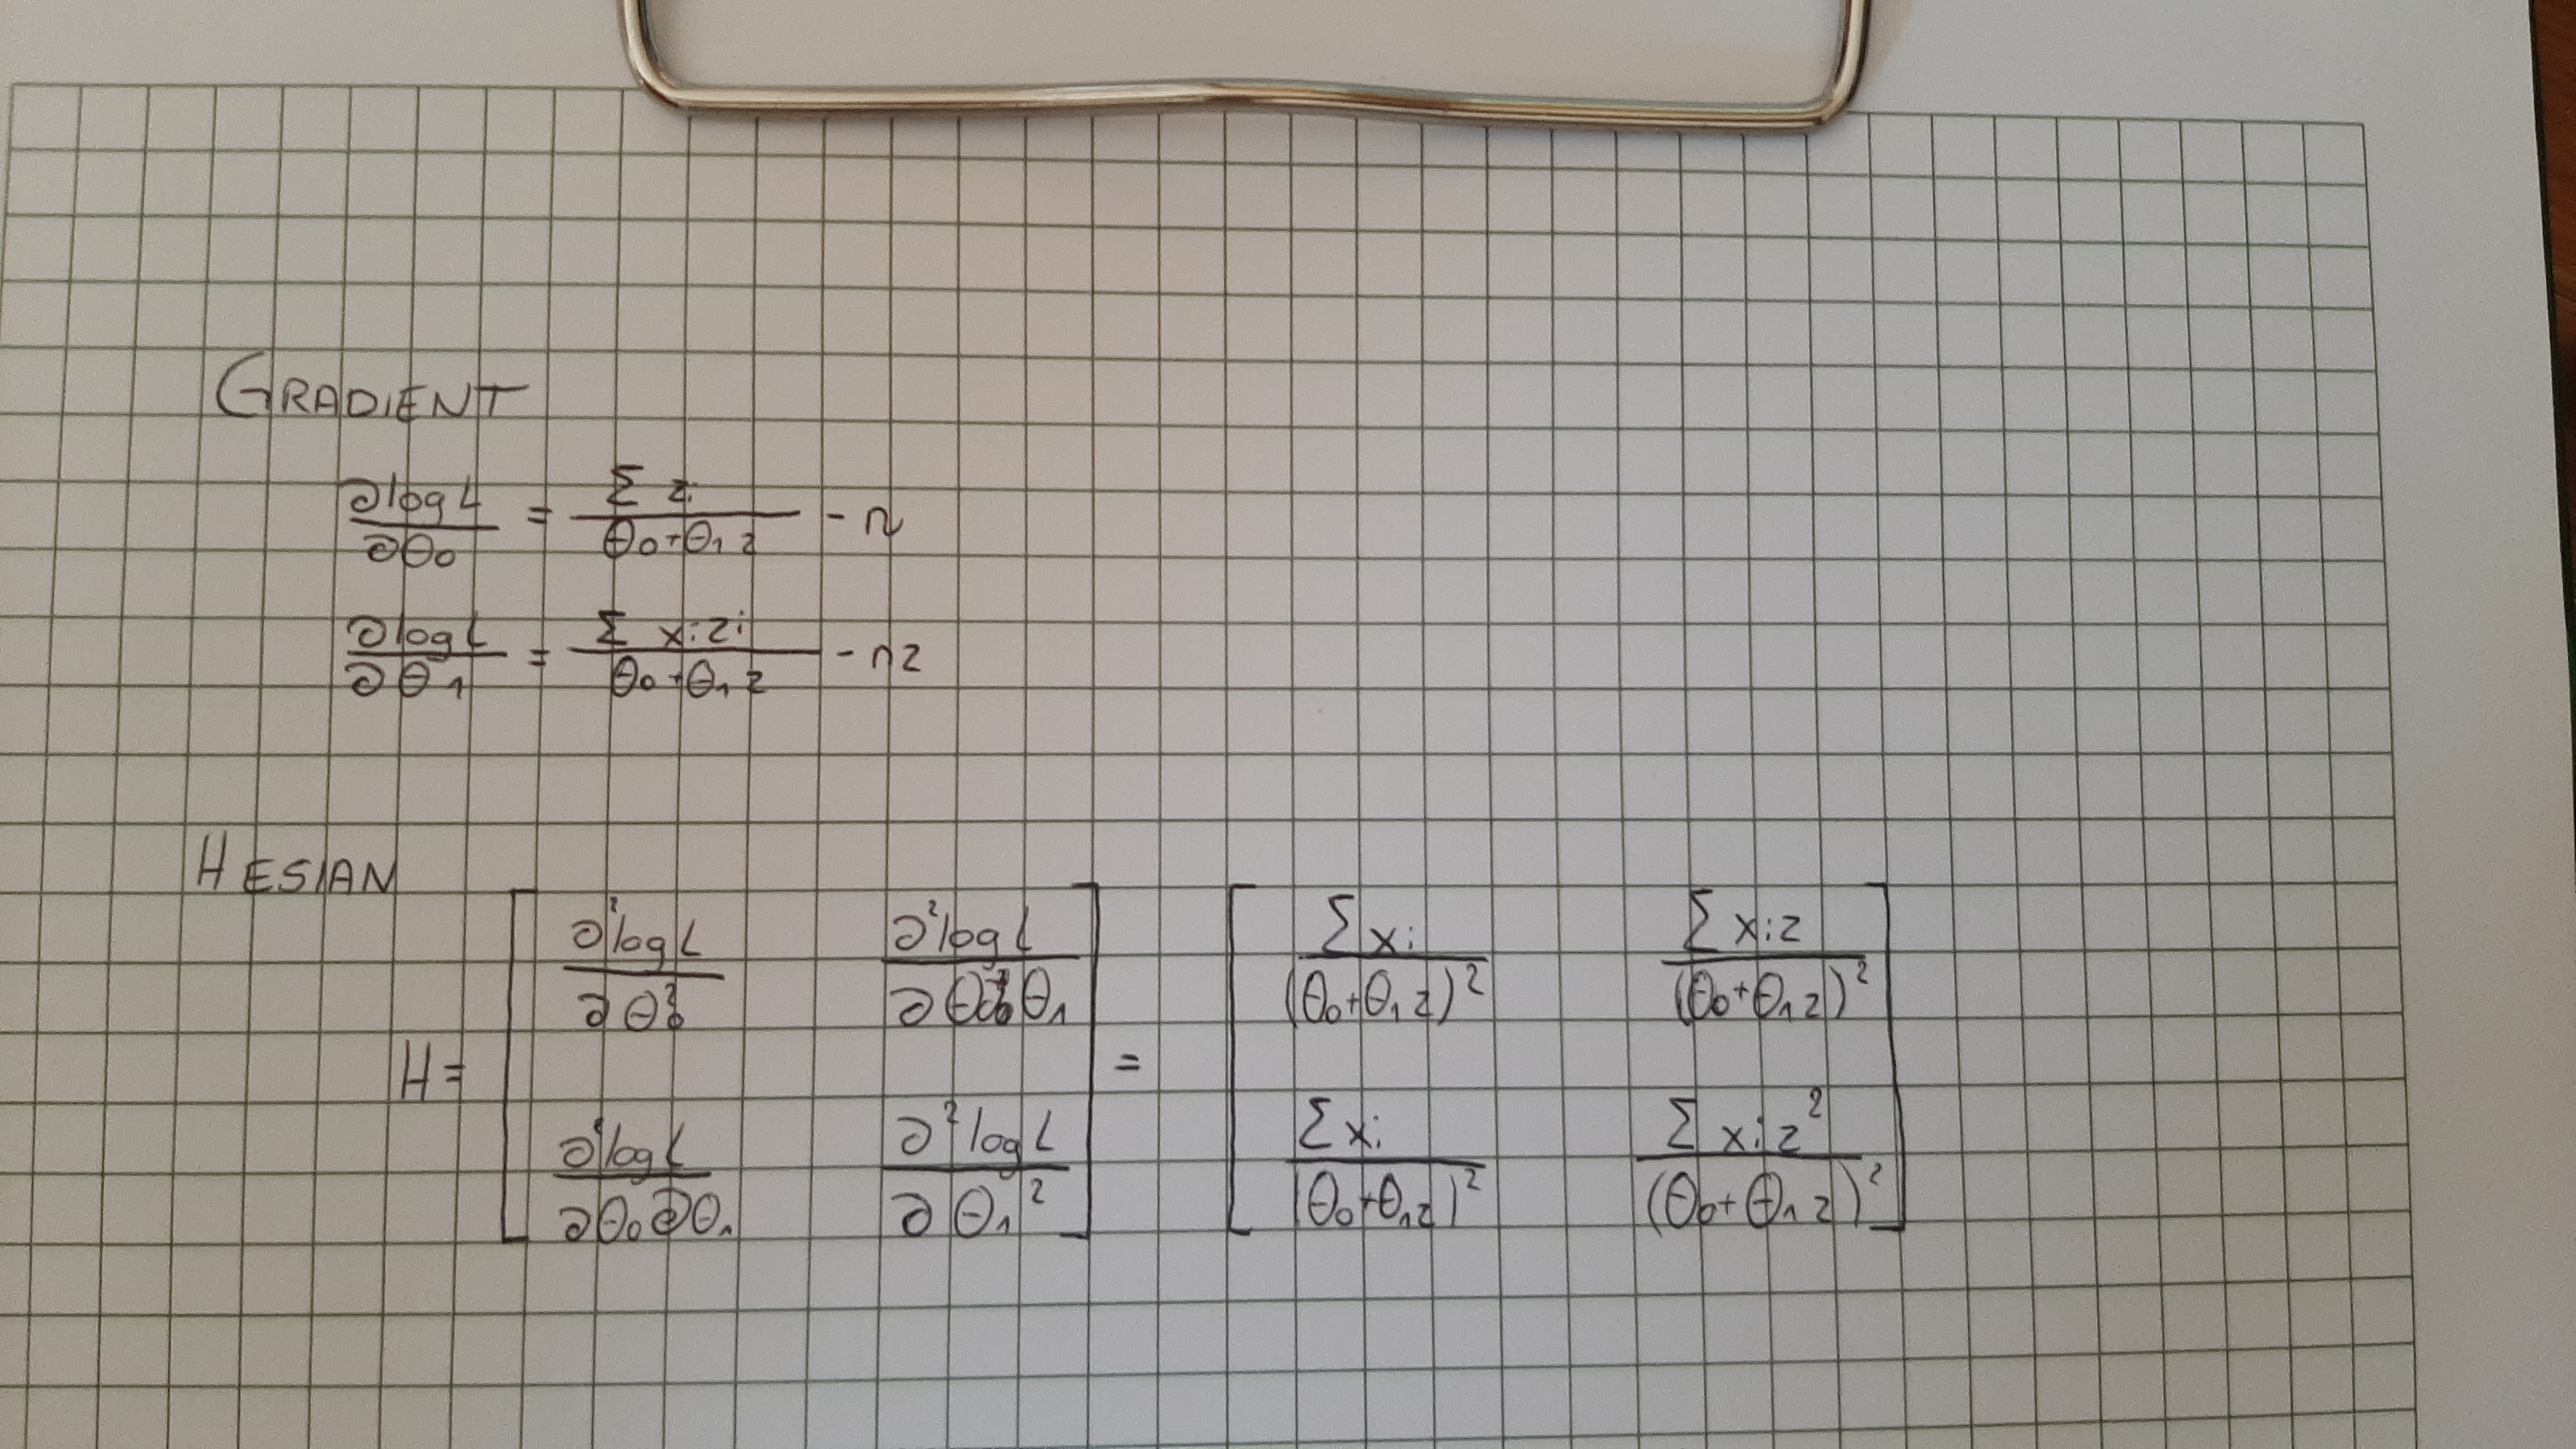